In [91]:
from pathlib import Path
from shutil import copyfile
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numbers
from tqdm import tqdm
from math import floor

In [92]:
np.random.seed(0)

In [93]:
def get_files_sets():
    path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/ICIAR2018_BACH_Challenge/'
    paths = [str(path) for path in Path(path).rglob('*.tif')]
    
    benign_files = list(filter(lambda f: 'Benign' in f, paths))
    insitu_files = list(filter(lambda f: 'InSitu' in f, paths))
    invasive_files = list(filter(lambda f: 'Invasive' in f, paths))  
    normal_files = list(filter(lambda f: 'Normal' in f, paths))
    
    return benign_files, insitu_files, invasive_files, normal_files

In [94]:
benign, insitu, invasive, normal = get_files_sets()
len(benign), len(insitu), len(invasive),len(normal)

(100, 100, 100, 100)

In [95]:
def get_splits(class_set):
    train_set, test_set = train_test_split(class_set, test_size=0.2)
    
    return train_set, test_set

In [96]:
benign_train_set, benign_test_set = get_splits(benign)
insitu_train_set, insitu_test_set = get_splits(insitu)
invasive_train_set, invasive_test_set = get_splits(invasive)
normal_train_set, normal_test_set = get_splits(normal)

In [97]:
train_set = []
train_set.extend(benign_train_set)
train_set.extend(insitu_train_set)
train_set.extend(invasive_train_set)
train_set.extend(normal_train_set)
len(train_set)

320

In [98]:
test_set = []
test_set.extend(benign_test_set)
test_set.extend(insitu_test_set)
test_set.extend(invasive_test_set)
test_set.extend(normal_test_set)
len(test_set)

80

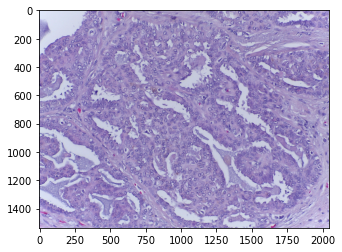

In [120]:
pic = Image.open(train_set[0])
plt.figure()
plt.imshow(pic)

In [121]:
pic = np.array(pic)
pic.shape

(1536, 2048, 3)

In [122]:
pic.shape[0] / 256, pic.shape[1] / 256

(6.0, 8.0)

In [123]:
vert_steps = floor(pic.shape[0] / 256)
hor_steps = floor(pic.shape[1] / 256)
vert_steps, hor_steps

(6, 8)

In [143]:
def crop(img, top, left, height, width):

    return img.crop((left, top, left + width, top + height))

In [164]:
def crop_img(img):
    # single PIL image as param
    
    height = 256
    width = 256
    
    vert_steps = floor(pic.size[1] / height)
    hor_steps = floor(pic.size[0] / width)
    
    resize_shape = (150,150)
    
    top = 0
    left = 0
    
    crops = []
    
    for i in range(vert_steps):
        for j in range(hor_steps):
            # Increment left by 256 pixels
            cropped = crop(img, top, left, height, width)
            resized = cropped.resize(resize_shape)
            resized = np.array(resized)
            crops.append(resized)
            left += width
        left = 0
        top += height
        
    return crops

In [165]:
pic = Image.open(train_set[0])
imgs = crop_img(pic)
len(imgs)

48

/home/ens/AM90950/anaconda3/envs/discri/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


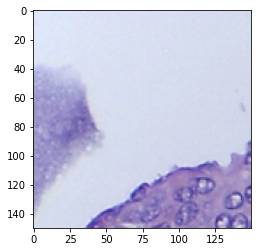

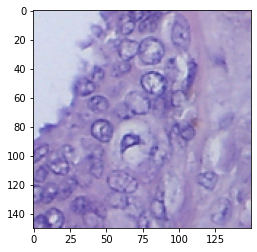

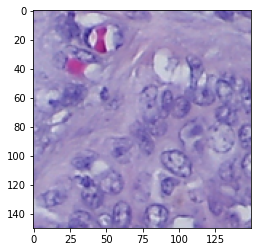

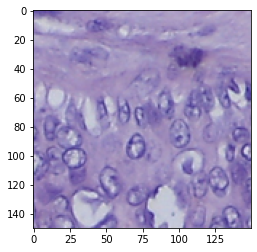

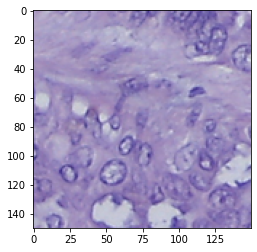

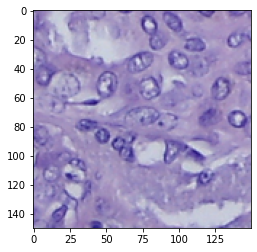

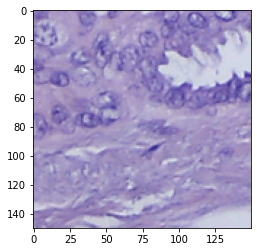

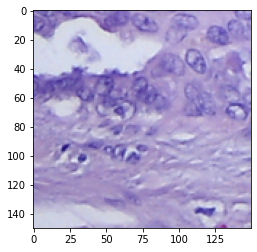

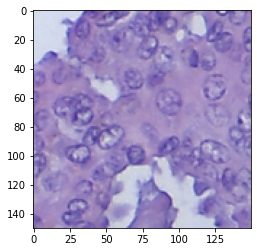

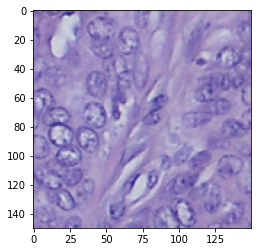

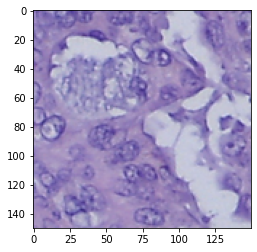

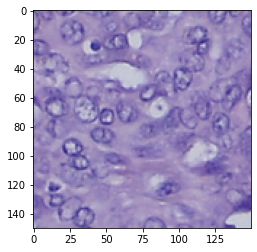

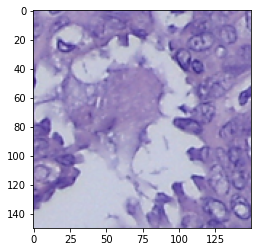

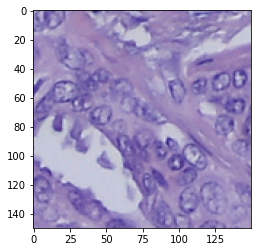

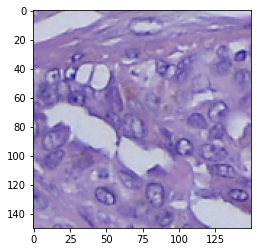

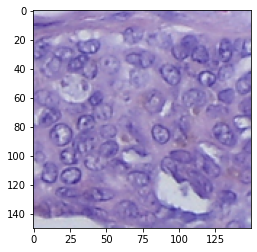

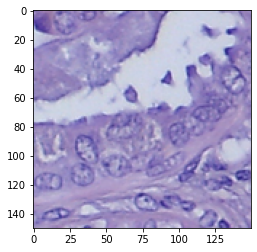

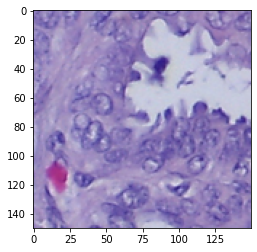

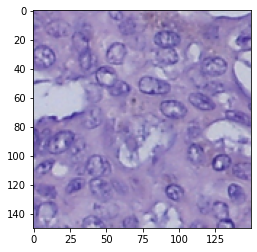

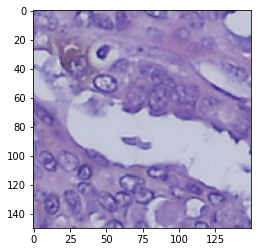

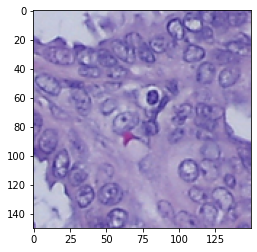

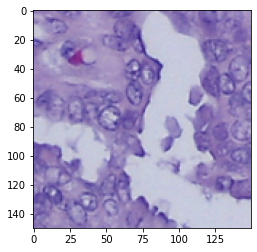

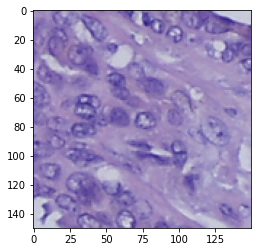

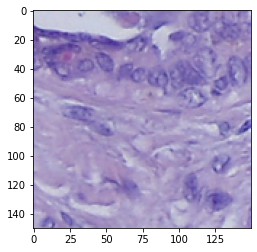

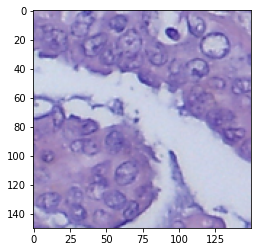

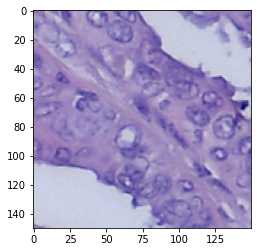

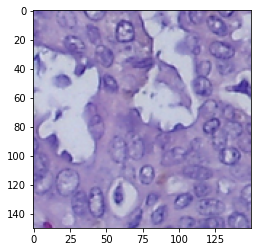

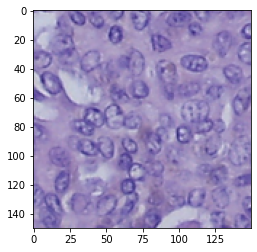

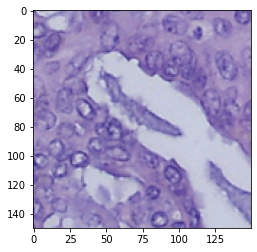

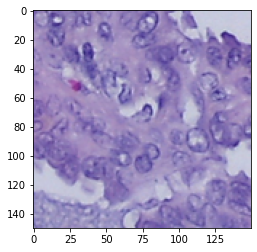

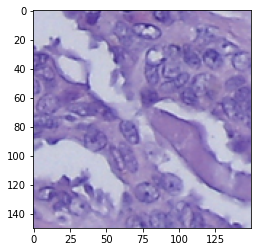

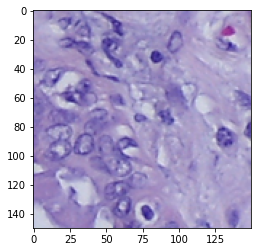

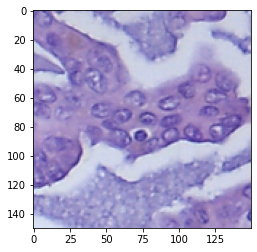

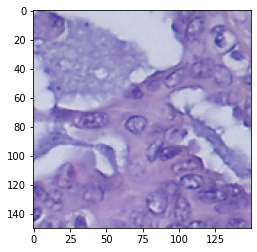

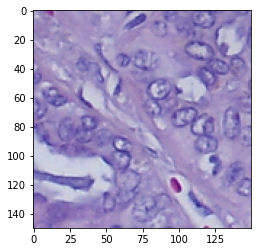

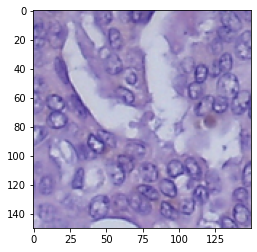

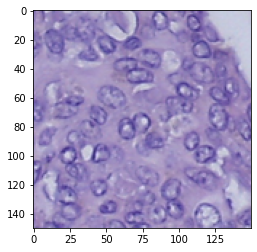

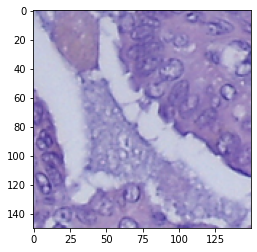

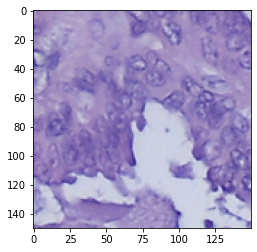

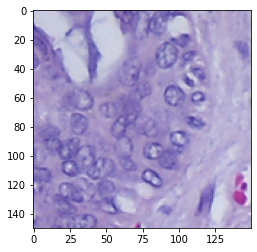

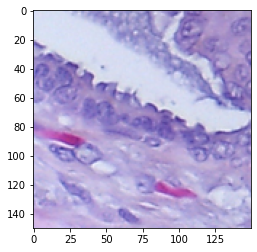

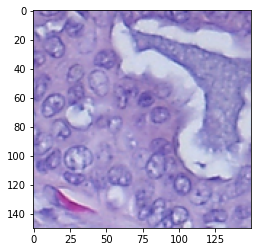

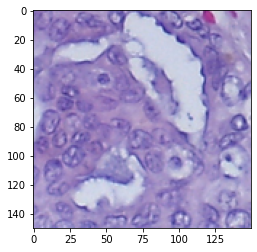

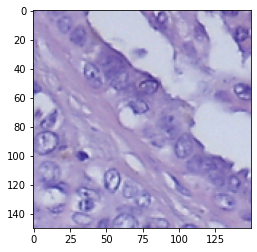

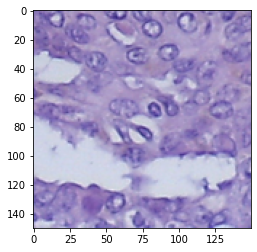

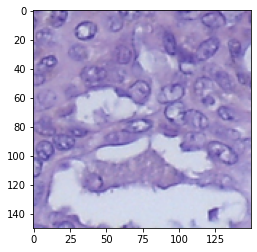

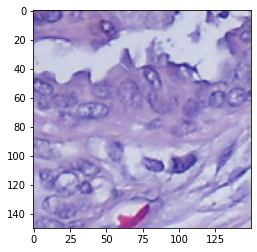

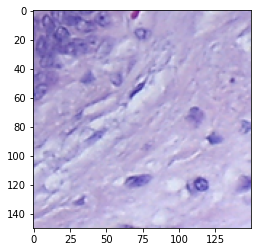

In [166]:
for p in imgs:
    plt.figure()
    plt.imshow(p)

In [167]:
def get_label(file_name):
    if 'Benign' in file_name:
        return 0
    elif 'InSitu' in file_name:
        return 1
    elif 'Invasive' in file_name:
        return 2
    elif 'Normal' in file_name:
        return 3

In [170]:
def parse_files_set(files_set):
    
    X = []
    y = []
    
    multiplier = 48
    
    for f in tqdm(files_set):
        img = Image.open(f)
        imgs = crop_img(img)
        
        X.extend(imgs)
        y.extend(multiplier * [get_label(f)])
        
    
    X = np.array(X).astype('float32') / 255
    y = np.asarray(y, dtype='uint8')
    
    return X, y

In [171]:
X_train, y_train = parse_files_set(train_set)
X_test, y_test = parse_files_set(test_set)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

100%|██████████| 80/80 [00:04<00:00, 17.73it/s]


((15360, 150, 150, 3), (15360,), (3840, 150, 150, 3), (3840,))

In [172]:
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [173]:
X_train[0], X_test[0]

(array([[[0.7176471 , 0.60784316, 0.79607844],
         [0.7137255 , 0.5882353 , 0.7921569 ],
         [0.70980394, 0.5764706 , 0.78431374],
         ...,
         [0.6862745 , 0.54901963, 0.77254903],
         [0.6666667 , 0.53333336, 0.78431374],
         [0.7019608 , 0.57254905, 0.8117647 ]],
 
        [[0.7019608 , 0.5921569 , 0.78431374],
         [0.6784314 , 0.58431375, 0.7921569 ],
         [0.6901961 , 0.5647059 , 0.7921569 ],
         ...,
         [0.69803923, 0.5372549 , 0.7529412 ],
         [0.69411767, 0.54901963, 0.7764706 ],
         [0.7411765 , 0.6039216 , 0.81960785]],
 
        [[0.6862745 , 0.5294118 , 0.7607843 ],
         [0.6862745 , 0.5529412 , 0.7921569 ],
         [0.72156864, 0.5686275 , 0.8117647 ],
         ...,
         [0.68235296, 0.54509807, 0.7490196 ],
         [0.7019608 , 0.5568628 , 0.7764706 ],
         [0.7490196 , 0.59607846, 0.8117647 ]],
 
        ...,
 
        [[0.3647059 , 0.20392157, 0.5803922 ],
         [0.37254903, 0.20784314, 0.58823

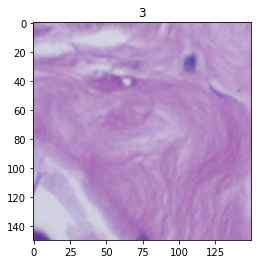

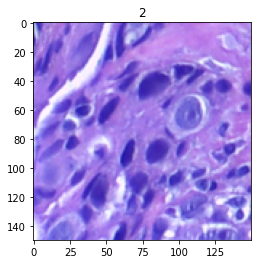

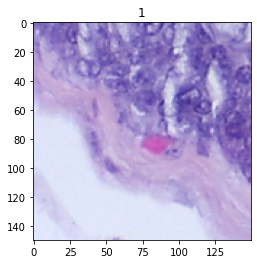

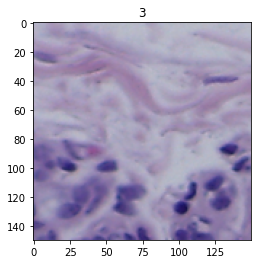

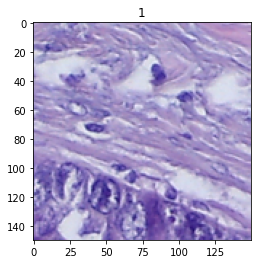

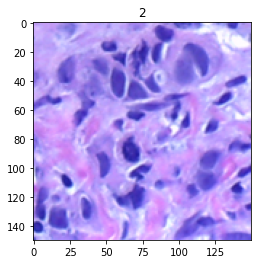

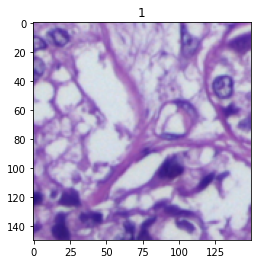

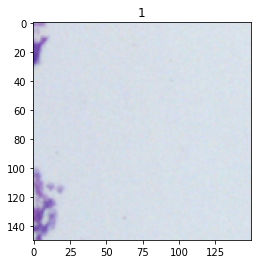

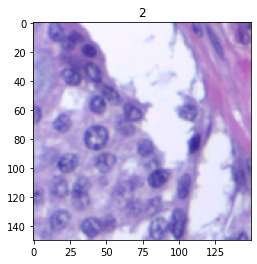

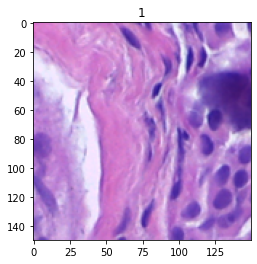

In [174]:
for i in range(10):
    plt.figure()
    plt.imshow(X_train[i])
    plt.title(y_train[i])

### Save to npy

In [176]:
base_path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/iciar/'
path_format = base_path + '{}'
p = Path(base_path)
p.mkdir(parents=True, exist_ok=True)

In [177]:
X_train, y_train = parse_files_set(train_set)
X_test, y_test = parse_files_set(test_set)

np.save(path_format.format('X_train_48'), X_train)
np.save(path_format.format('y_train_48'), y_train)
np.save(path_format.format('X_test_48'), X_test)
np.save(path_format.format('y_test_48'), y_test)

100%|██████████| 80/80 [00:04<00:00, 17.79it/s]


In [178]:
def load_iciar(mode):
    assert mode in ['single', 'five', 'ten', '48']
    
    path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/iciar/'
    
    x_train_file = 'X_train_{}.npy'.format(mode)
    y_train_file = 'y_train_{}.npy'.format(mode)    
    x_test_file = 'X_test_{}.npy'.format(mode)  
    y_test_file = 'y_test_{}.npy'.format(mode)
    
    X_train = np.load(path + x_train_file)
    y_train = np.load(path + y_train_file)
    X_test = np.load(path + x_test_file)
    y_test = np.load(path + y_test_file)
    
    return (X_train, y_train), (X_test, y_test)

In [179]:
(X_train, y_train), (X_test, y_test) = load_iciar('48')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15360, 150, 150, 3), (15360,), (3840, 150, 150, 3), (3840,))